# Ecommerce Customer Behavior

Libraries


In [ ]:
# ================================
# Data Download (Kaggle)
# ================================
import kagglehub   # For downloading datasets from Kaggle
import os          # For file and directory operations


# ================================
# Core Libraries
# ================================
import pandas as pd    # Data manipulation and analysis
import numpy as np     # Numerical computations


# ================================
# Data Visualization / EDA
# ================================
import seaborn as sns          # Statistical data visualization
import matplotlib.pyplot as plt  # Plotting library


# ================================
# Machine Learning - Utilities
# ================================
from sklearn.model_selection import train_test_split  # Train-test split
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Data preprocessing
from sklearn.compose import ColumnTransformer  # Apply transformations to columns
from sklearn.pipeline import Pipeline  # ML pipelines


# ================================
# Machine Learning - Models
# ================================
from sklearn.ensemble import (
    RandomForestClassifier,       # Classification model
    GradientBoostingRegressor     # Regression model
)

from sklearn.decomposition import PCA   # Dimensionality reduction
from sklearn.cluster import KMeans      # Clustering algorithm


# ================================
# Machine Learning - Evaluation Metrics
# ================================
from sklearn.metrics import (
    classification_report,  # Classification metrics
    roc_auc_score,           # ROC-AUC score
    mean_squared_error,      # Regression error metric
    r2_score                 # Regression performance metric
)


In [ ]:


# Download latest version
path = kagglehub.dataset_download("dhairyajeetsingh/ecommerce-customer-behavior-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.96M/1.96M [00:00<00:00, 23.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/dhairyajeetsingh/ecommerce-customer-behavior-dataset/versions/1


In [ ]:
#to get the filename/see files in that path
os.listdir(path)


['ecommerce_customer_churn_dataset.csv']

In [ ]:
#create dataframe

csv_path = os.path.join(path, "ecommerce_customer_churn_dataset.csv")
df = pd.read_csv(csv_path)
print('dataframe created successfully')

dataframe created successfully


In [ ]:
#Confirm data is loaded

df.head()

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,Male,France,Marseille,2.9,14.0,27.4,6.0,50.6,3.0,...,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1
1,36.0,Male,UK,Manchester,1.6,15.0,42.7,10.3,37.7,1.0,...,42.8,7.0,3.0,NaN,23.3,3.0,1067.47,3028.0,0,Q4
2,45.0,Female,Canada,Vancouver,2.9,10.0,24.8,1.6,70.9,1.0,...,0.0,4.0,1.0,NaN,8.8,NaN,1289.75,2317.0,0,Q4
3,56.0,Female,USA,New York,2.6,10.0,38.4,14.8,41.7,9.0,...,41.4,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,Q1
4,35.0,Male,India,Delhi,3.1,29.0,51.4,NaN,19.1,9.0,...,37.9,1.0,11.0,83.0,50.4,4.0,3041.29,5354.0,0,Q4


In [ ]:
df.tail()

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
49995,38.0,Female,USA,Los Angeles,10.0,10.0,35.8,8.8,51.2,3.0,...,9.2,5.0,1.0,20.7,25.2,1.0,2365.98,3499.0,0,Q2
49996,37.0,Male,USA,Chicago,1.4,21.0,32.4,9.6,32.5,2.0,...,17.6,5.0,3.0,38.6,12.1,4.0,1293.60,3154.0,0,Q3
49997,44.0,Female,USA,Phoenix,2.8,19.0,40.3,10.4,50.6,1.0,...,25.2,4.0,6.0,59.9,NaN,1.0,1655.28,1622.0,0,Q1
49998,41.0,Female,USA,Chicago,2.9,17.0,29.9,10.1,60.8,1.0,...,34.6,5.0,2.0,NaN,14.1,3.0,1286.11,2634.0,0,Q2
49999,56.0,Male,UK,Leeds,2.2,2.0,18.2,NaN,46.0,0.0,...,0.0,7.0,0.0,0.0,4.2,1.0,1072.61,612.0,0,Q3


In [ ]:
df.shape



(50000, 25)

In [ ]:
df.columns

Index(['Age', 'Gender', 'Country', 'City', 'Membership_Years',
       'Login_Frequency', 'Session_Duration_Avg', 'Pages_Per_Session',
       'Cart_Abandonment_Rate', 'Wishlist_Items', 'Total_Purchases',
       'Average_Order_Value', 'Days_Since_Last_Purchase',
       'Discount_Usage_Rate', 'Returns_Rate', 'Email_Open_Rate',
       'Customer_Service_Calls', 'Product_Reviews_Written',
       'Social_Media_Engagement_Score', 'Mobile_App_Usage',
       'Payment_Method_Diversity', 'Lifetime_Value', 'Credit_Balance',
       'Churned', 'Signup_Quarter'],
      dtype='object')

In [ ]:
df.describe()

,Age,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,Average_Order_Value,Days_Since_Last_Purchase,...,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned
count,47505.000000,50000.000000,50000.000000,46601.000000,47000.000000,50000.000000,46000.000000,50000.000000,50000.000000,47000.000000,...,45509.000000,47472.000000,49832.000000,46500.000000,44000.000000,45000.000000,47500.000000,50000.000000,44500.000000,50000.000000
mean,37.802968,2.984009,11.624660,27.660754,8.737811,57.079973,4.298391,13.111576,123.117330,29.792872,...,6.680913,20.937980,5.681831,2.853312,29.364466,19.371607,2.353874,1440.626292,1966.233258,0.289000
std,11.834668,2.059105,7.810657,10.871013,3.778220,16.282723,3.189754,7.017312,175.569714,29.695062,...,6.143027,14.252561,2.676052,2.328948,20.574021,9.419252,1.110012,907.249443,1225.072166,0.453302
min,5.000000,0.100000,0.000000,1.000000,1.000000,0.000000,0.000000,-13.000000,26.380000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,29.000000,1.400000,6.000000,19.700000,6.000000,46.400000,2.000000,8.000000,87.050000,9.000000,...,2.900000,9.900000,4.000000,1.000000,13.200000,12.500000,2.000000,789.817500,1049.000000,0.000000
50%,38.000000,2.500000,11.000000,26.800000,8.400000,58.100000,4.000000,12.000000,112.970000,21.000000,...,5.400000,19.700000,5.000000,2.000000,27.600000,18.600000,2.000000,1243.415000,1896.000000,0.000000
75%,46.000000,4.000000,17.000000,34.700000,11.200000,68.700000,6.000000,17.000000,144.440000,41.000000,...,9.100000,30.400000,7.000000,4.000000,43.100000,25.500000,3.000000,1874.000000,2791.000000,1.000000
max,200.000000,10.000000,46.000000,75.600000,24.100000,143.743350,28.000000,128.700000,9666.379178,287.000000,...,99.615734,91.700000,21.000000,21.000000,100.000000,61.900000,5.000000,8987.240000,7197.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            47505 non-null  float64
 1   Gender                         50000 non-null  object 
 2   Country                        50000 non-null  object 
 3   City                           50000 non-null  object 
 4   Membership_Years               50000 non-null  float64
 5   Login_Frequency                50000 non-null  float64
 6   Session_Duration_Avg           46601 non-null  float64
 7   Pages_Per_Session              47000 non-null  float64
 8   Cart_Abandonment_Rate          50000 non-null  float64
 9   Wishlist_Items                 46000 non-null  float64
 10  Total_Purchases                50000 non-null  float64
 11  Average_Order_Value            50000 non-null  float64
 12  Days_Since_Last_Purchase       47000 non-null 

In [ ]:
df.isnull().sum()

,0
Age,2495
Gender,0
Country,0
City,0
Membership_Years,0
Login_Frequency,0
Session_Duration_Avg,3399
Pages_Per_Session,3000
Cart_Abandonment_Rate,0
Wishlist_Items,4000


Missing Values Analysis


| Feature                       | Missing % | Business Interpretation              |
| ----------------------------- | --------- | ------------------------------------ |
| Social_Media_Engagement_Score | **12%**   | Users not active on social platforms |
| Credit_Balance                | **11%**   | Customers not using store credit     |
| Mobile_App_Usage              | **10%**   | Web-only customers                   |
| Returns_Rate                  | **~9%**   | No returns made                      |
| Wishlist_Items                | **8%**    | No wishlist behavior                 |
| Session_Duration_Avg          | **7%**    | Tracking gaps or inactive users      |


## EDA
---
EDA was performed prior to missing value imputation to understand data distributions and identify meaningful patterns in customer behavior

In [ ]:
#understanding the target variable

df['Churned'].value_counts(normalize=True) * 100


,proportion
Churned,
0,71.1
1,28.9


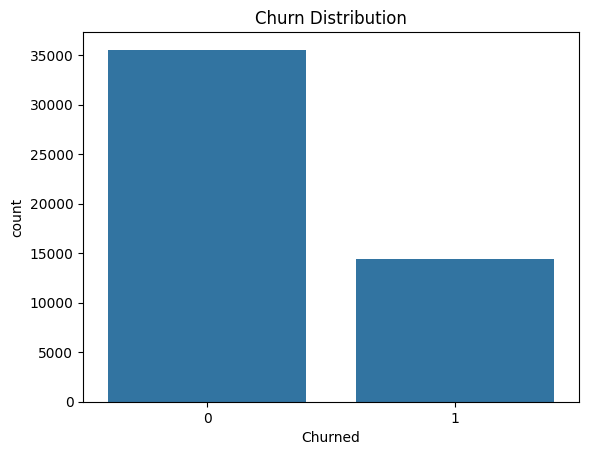

In [ ]:
sns.countplot(x='Churned', data=df)
plt.title("Churn Distribution")
plt.show()


--- Age ---
count    47505.000000
mean        37.802968
std         11.834668
min          5.000000
25%         29.000000
50%         38.000000
75%         46.000000
max        200.000000
Name: Age, dtype: float64


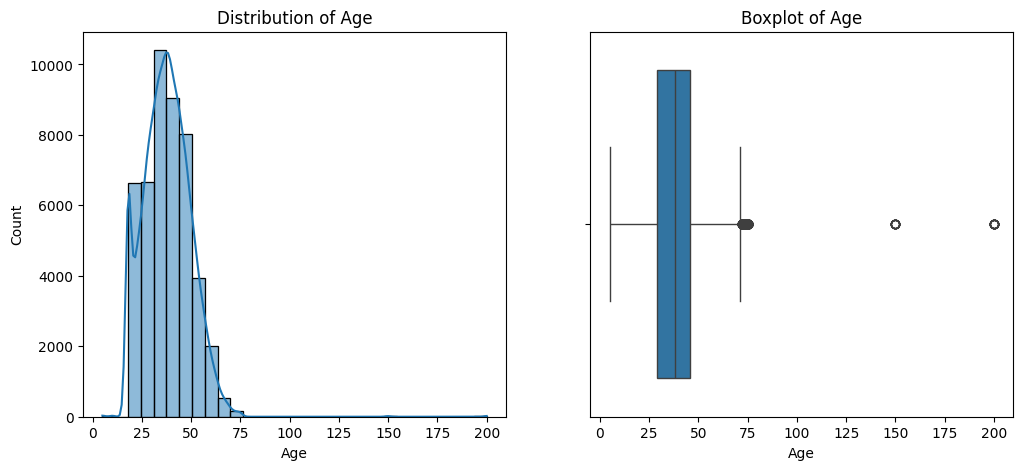

 * Age is approximately symmetric
 * Age is leptokurtic (peaked)

--- Membership_Years ---
count    50000.000000
mean         2.984009
std          2.059105
min          0.100000
25%          1.400000
50%          2.500000
75%          4.000000
max         10.000000
Name: Membership_Years, dtype: float64


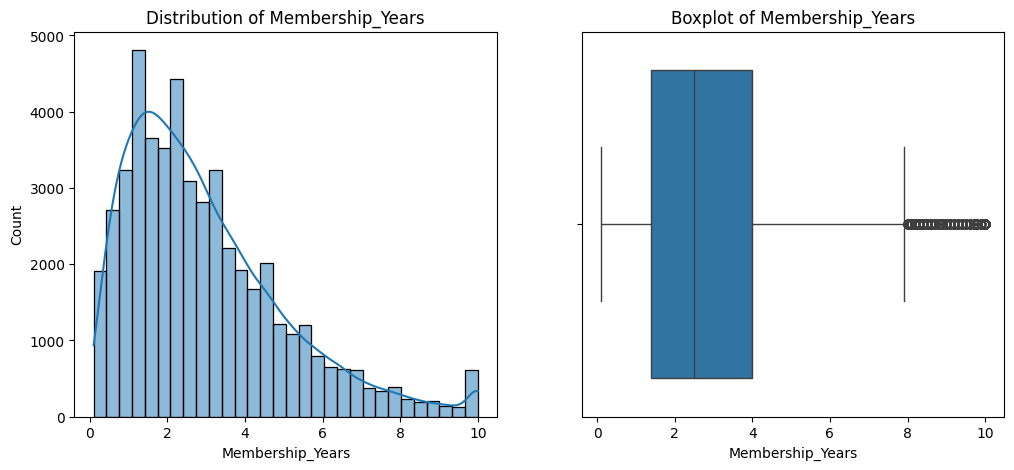

 * Membership_Years is right-skewed
 * Membership_Years is leptokurtic (peaked)

--- Login_Frequency ---
count    50000.000000
mean        11.624660
std          7.810657
min          0.000000
25%          6.000000
50%         11.000000
75%         17.000000
max         46.000000
Name: Login_Frequency, dtype: float64


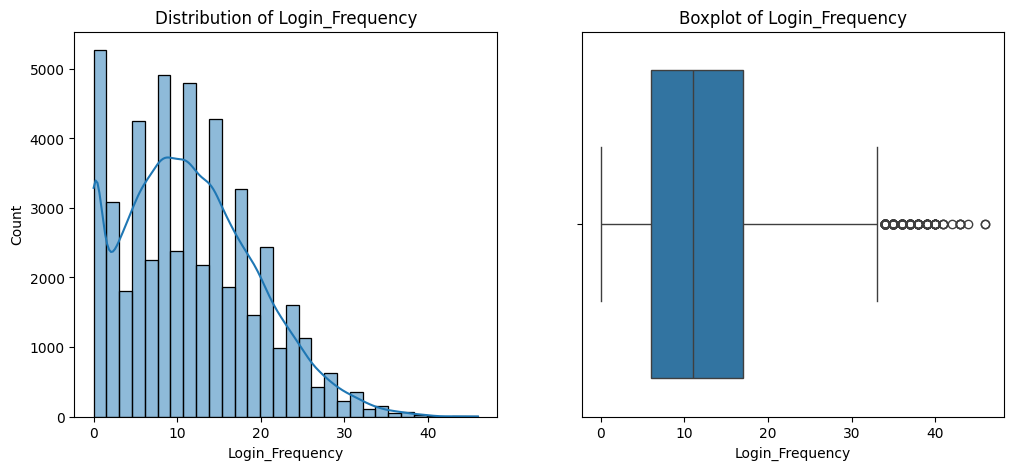

 * Login_Frequency is approximately symmetric
 * Login_Frequency is platykurtic (flat)

--- Session_Duration_Avg ---
count    46601.000000
mean        27.660754
std         10.871013
min          1.000000
25%         19.700000
50%         26.800000
75%         34.700000
max         75.600000
Name: Session_Duration_Avg, dtype: float64


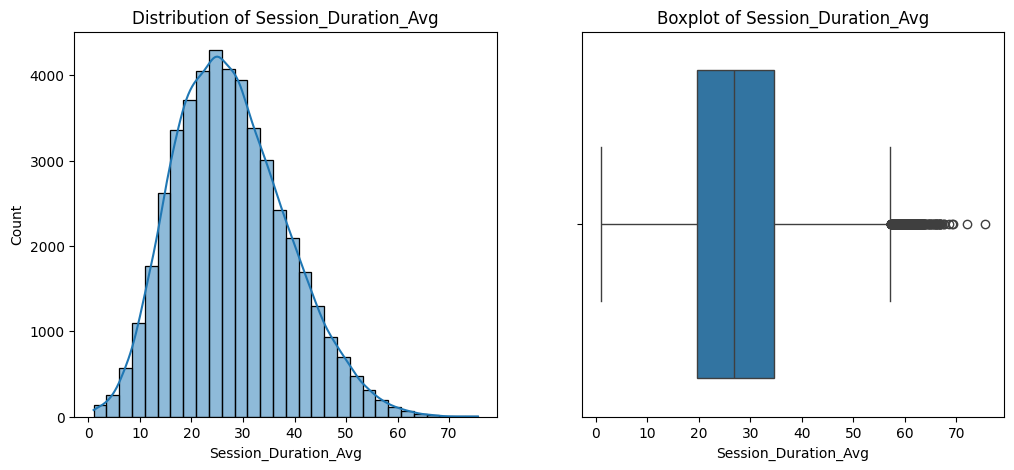

 * Session_Duration_Avg is approximately symmetric
 * Session_Duration_Avg is platykurtic (flat)

--- Pages_Per_Session ---
count    47000.000000
mean         8.737811
std          3.778220
min          1.000000
25%          6.000000
50%          8.400000
75%         11.200000
max         24.100000
Name: Pages_Per_Session, dtype: float64


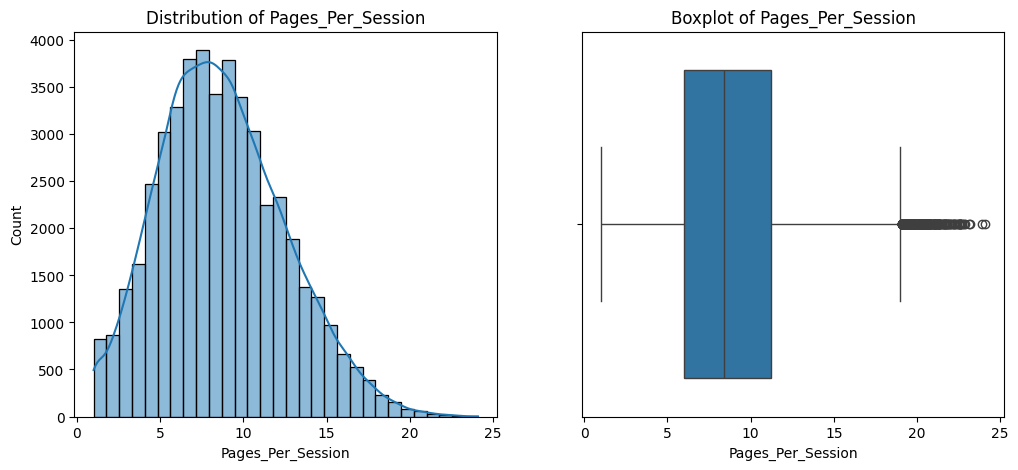

 * Pages_Per_Session is approximately symmetric
 * Pages_Per_Session is platykurtic (flat)

--- Cart_Abandonment_Rate ---
count    50000.000000
mean        57.079973
std         16.282723
min          0.000000
25%         46.400000
50%         58.100000
75%         68.700000
max        143.743350
Name: Cart_Abandonment_Rate, dtype: float64


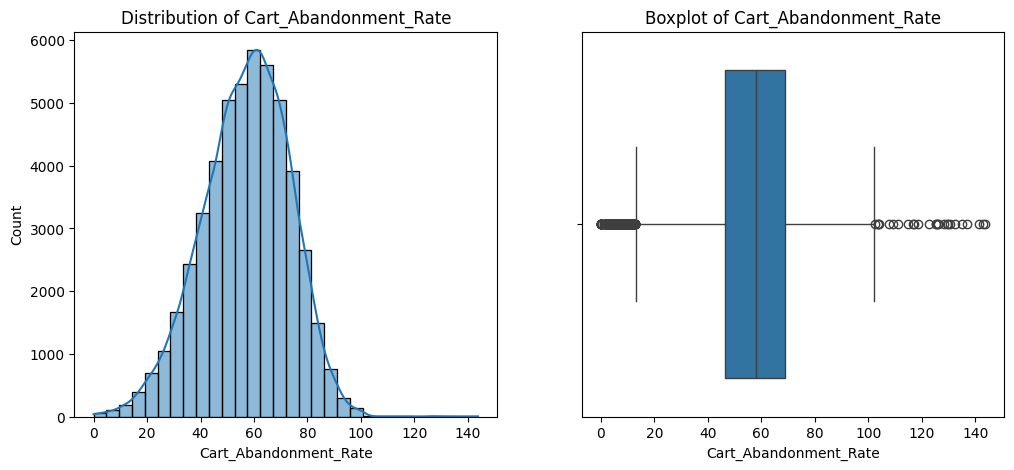

 * Cart_Abandonment_Rate is approximately symmetric
 * Cart_Abandonment_Rate is leptokurtic (peaked)

--- Wishlist_Items ---
count    46000.000000
mean         4.298391
std          3.189754
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         28.000000
Name: Wishlist_Items, dtype: float64


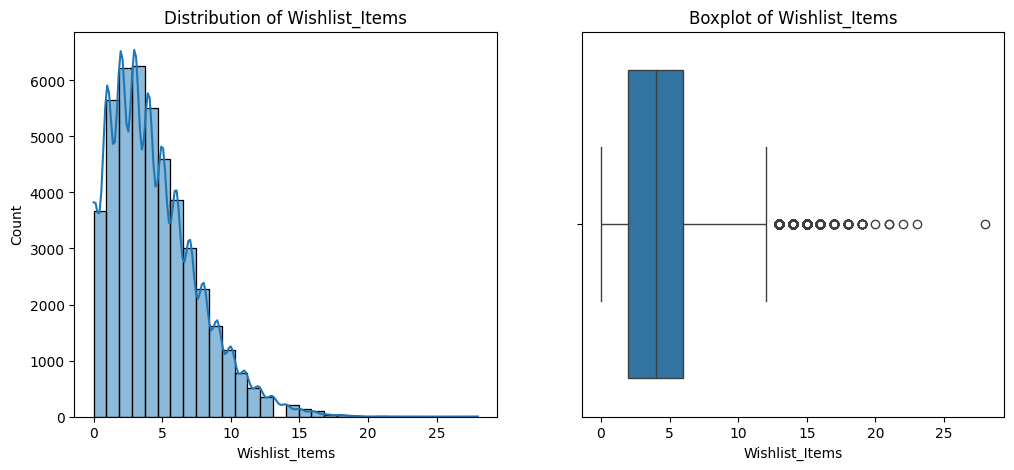

 * Wishlist_Items is approximately symmetric
 * Wishlist_Items is leptokurtic (peaked)

--- Total_Purchases ---
count    50000.000000
mean        13.111576
std          7.017312
min        -13.000000
25%          8.000000
50%         12.000000
75%         17.000000
max        128.700000
Name: Total_Purchases, dtype: float64


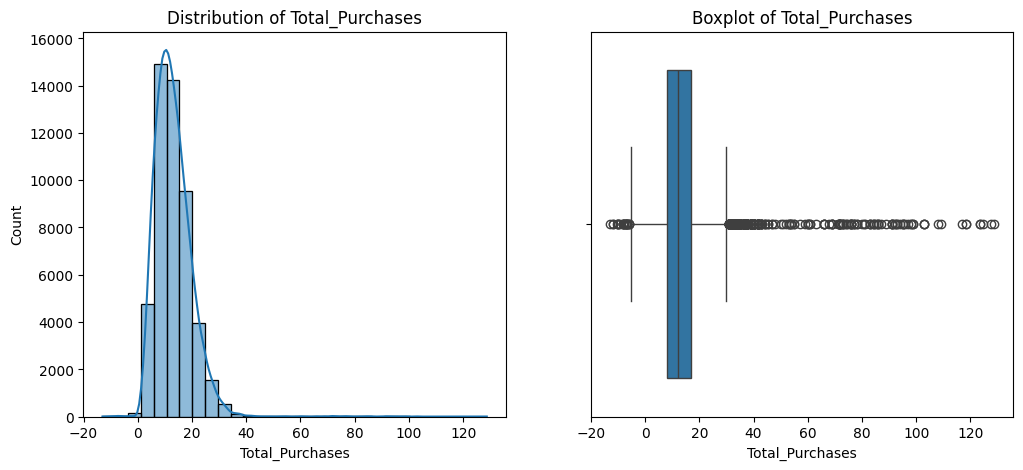

 * Total_Purchases is right-skewed
 * Total_Purchases is leptokurtic (peaked)

--- Average_Order_Value ---
count    50000.000000
mean       123.117330
std        175.569714
min         26.380000
25%         87.050000
50%        112.970000
75%        144.440000
max       9666.379178
Name: Average_Order_Value, dtype: float64


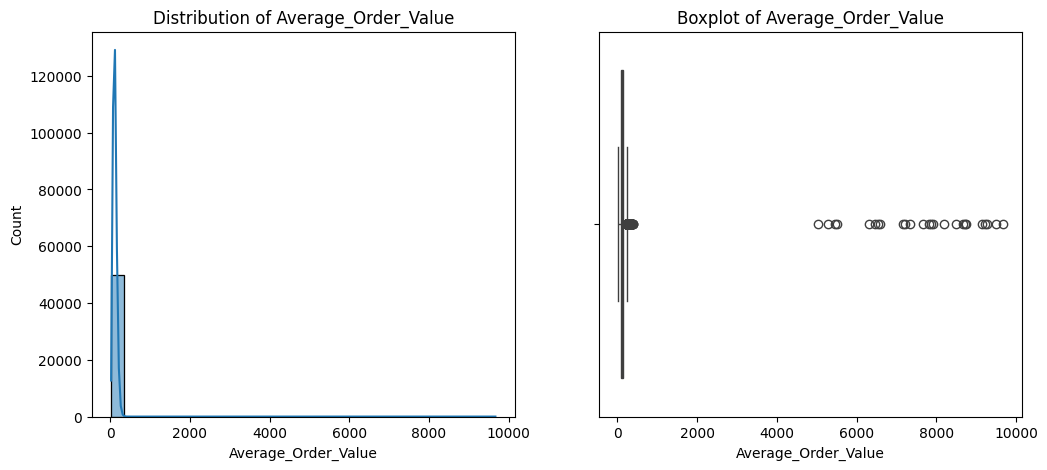

 * Average_Order_Value is right-skewed
 * Average_Order_Value is leptokurtic (peaked)

--- Days_Since_Last_Purchase ---
count    47000.000000
mean        29.792872
std         29.695062
min          0.000000
25%          9.000000
50%         21.000000
75%         41.000000
max        287.000000
Name: Days_Since_Last_Purchase, dtype: float64


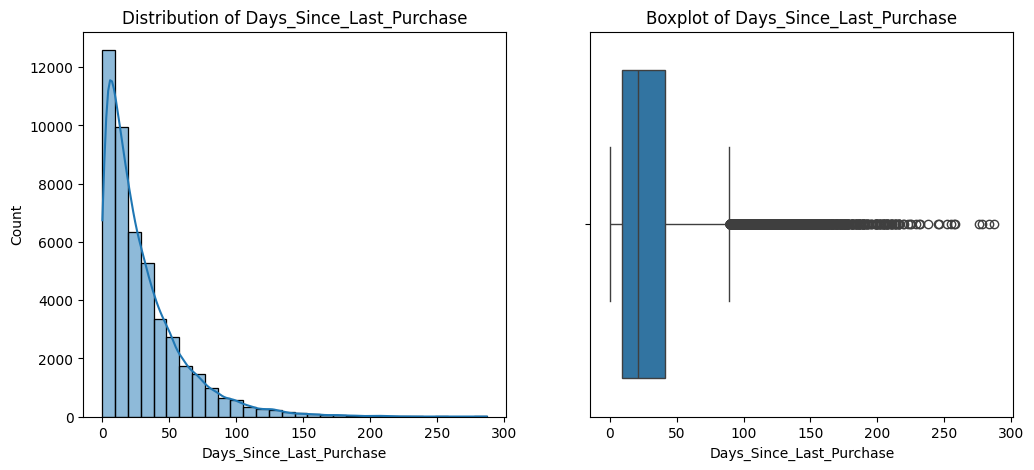

 * Days_Since_Last_Purchase is right-skewed
 * Days_Since_Last_Purchase is leptokurtic (peaked)

--- Discount_Usage_Rate ---
count    46500.000000
mean        41.997485
std         21.373642
min          0.240000
25%         25.300000
50%         40.200000
75%         57.000000
max        116.640000
Name: Discount_Usage_Rate, dtype: float64


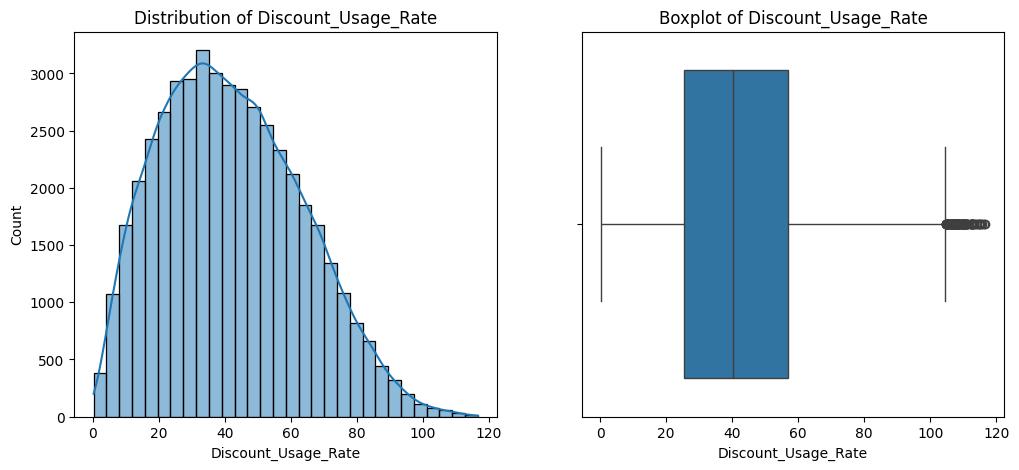

 * Discount_Usage_Rate is approximately symmetric
 * Discount_Usage_Rate is platykurtic (flat)

--- Returns_Rate ---
count    45509.000000
mean         6.680913
std          6.143027
min          0.000000
25%          2.900000
50%          5.400000
75%          9.100000
max         99.615734
Name: Returns_Rate, dtype: float64


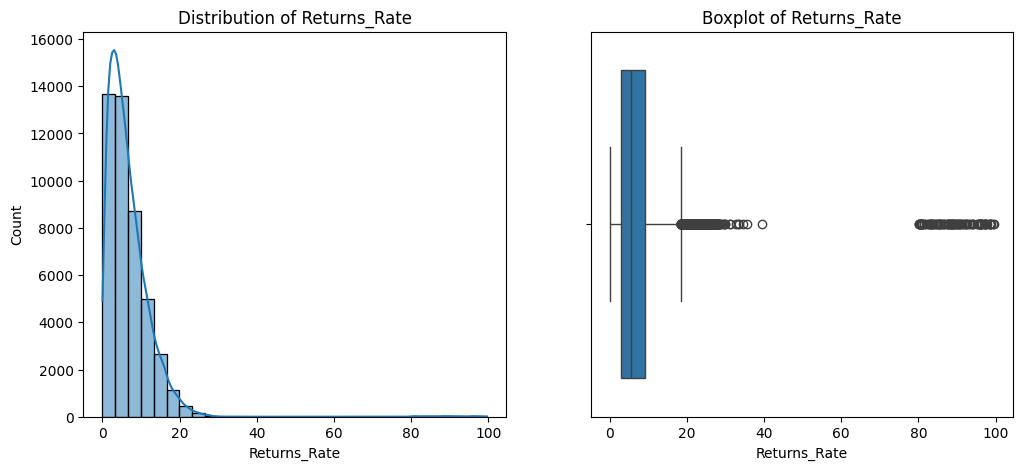

 * Returns_Rate is right-skewed
 * Returns_Rate is leptokurtic (peaked)

--- Email_Open_Rate ---
count    47472.000000
mean        20.937980
std         14.252561
min          0.000000
25%          9.900000
50%         19.700000
75%         30.400000
max         91.700000
Name: Email_Open_Rate, dtype: float64


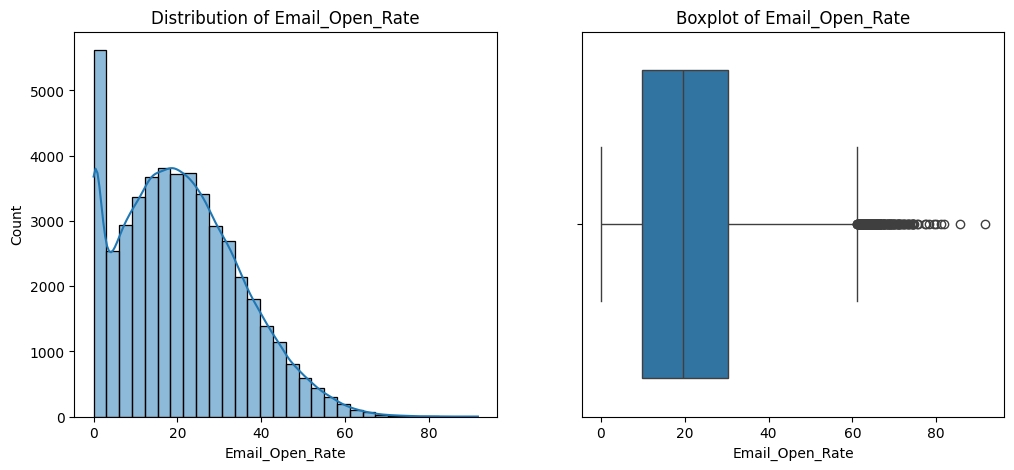

 * Email_Open_Rate is approximately symmetric
 * Email_Open_Rate is platykurtic (flat)

--- Customer_Service_Calls ---
count    49832.000000
mean         5.681831
std          2.676052
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         21.000000
Name: Customer_Service_Calls, dtype: float64


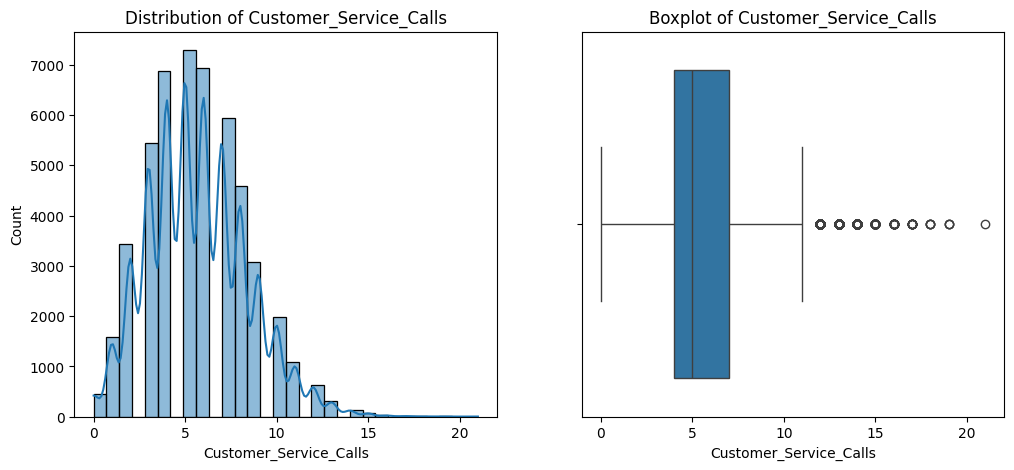

 * Customer_Service_Calls is approximately symmetric
 * Customer_Service_Calls is leptokurtic (peaked)

--- Product_Reviews_Written ---
count    46500.000000
mean         2.853312
std          2.328948
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         21.000000
Name: Product_Reviews_Written, dtype: float64


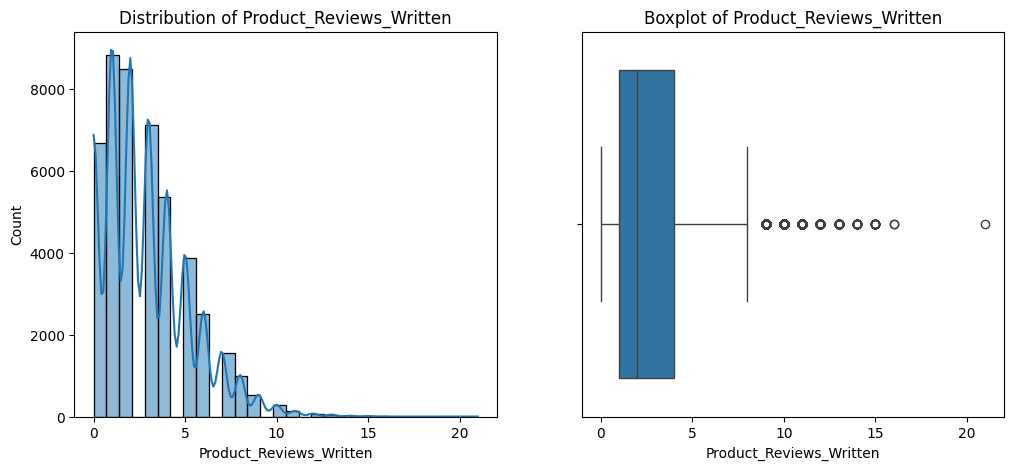

 * Product_Reviews_Written is right-skewed
 * Product_Reviews_Written is leptokurtic (peaked)

--- Social_Media_Engagement_Score ---
count    44000.000000
mean        29.364466
std         20.574021
min          0.000000
25%         13.200000
50%         27.600000
75%         43.100000
max        100.000000
Name: Social_Media_Engagement_Score, dtype: float64


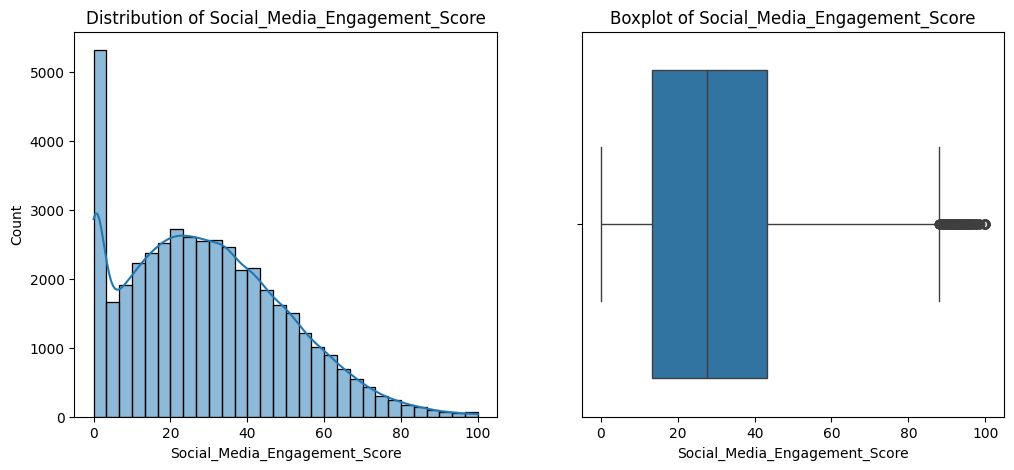

 * Social_Media_Engagement_Score is approximately symmetric
 * Social_Media_Engagement_Score is platykurtic (flat)

--- Mobile_App_Usage ---
count    45000.000000
mean        19.371607
std          9.419252
min          0.000000
25%         12.500000
50%         18.600000
75%         25.500000
max         61.900000
Name: Mobile_App_Usage, dtype: float64


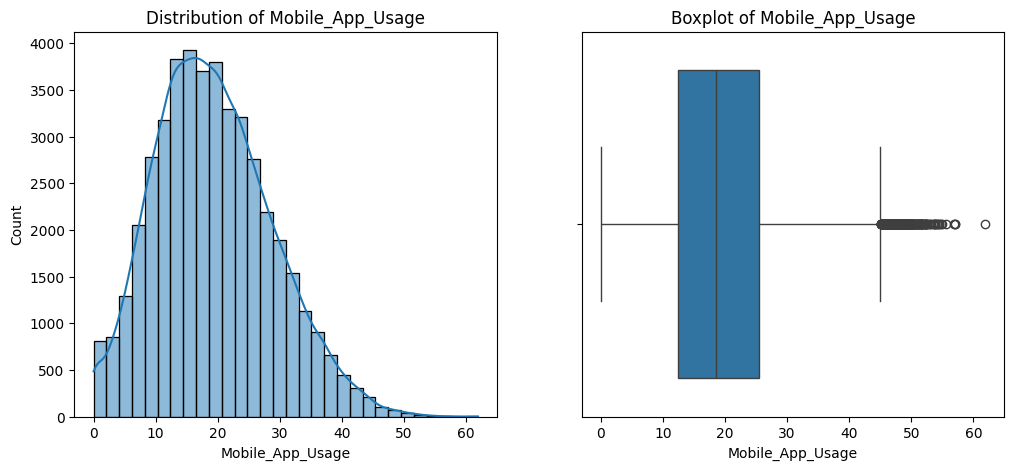

 * Mobile_App_Usage is approximately symmetric
 * Mobile_App_Usage is platykurtic (flat)

--- Payment_Method_Diversity ---
count    47500.000000
mean         2.353874
std          1.110012
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: Payment_Method_Diversity, dtype: float64


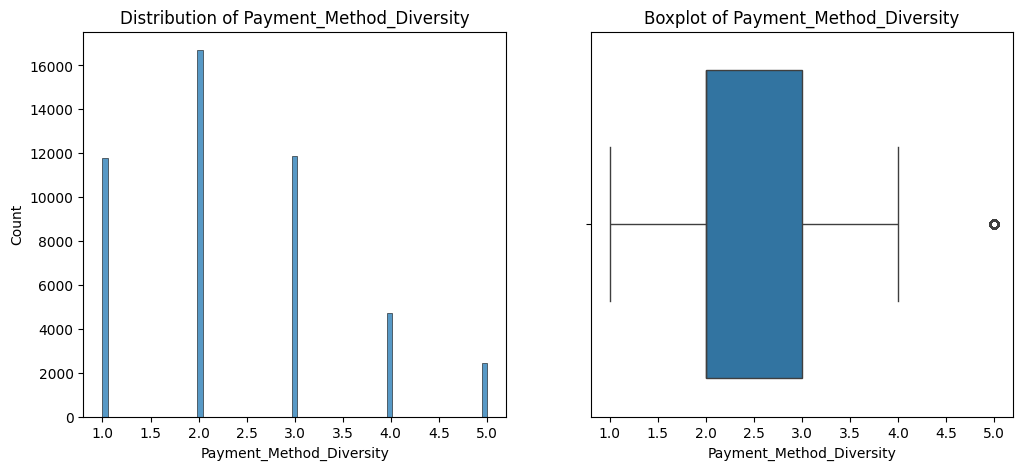

 * Payment_Method_Diversity is approximately symmetric
 * Payment_Method_Diversity is platykurtic (flat)

--- Lifetime_Value ---
count    50000.000000
mean      1440.626292
std        907.249443
min          0.000000
25%        789.817500
50%       1243.415000
75%       1874.000000
max       8987.240000
Name: Lifetime_Value, dtype: float64


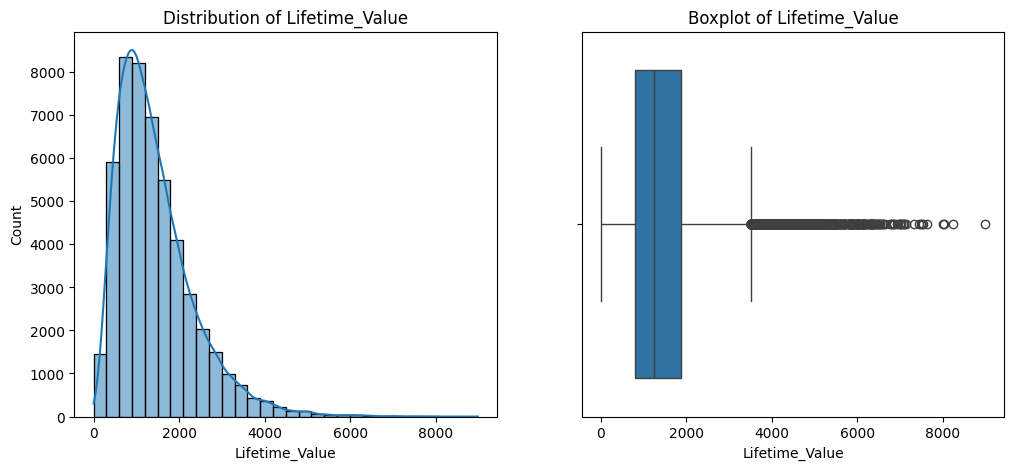

 * Lifetime_Value is right-skewed
 * Lifetime_Value is leptokurtic (peaked)

--- Credit_Balance ---
count    44500.000000
mean      1966.233258
std       1225.072166
min          0.000000
25%       1049.000000
50%       1896.000000
75%       2791.000000
max       7197.000000
Name: Credit_Balance, dtype: float64


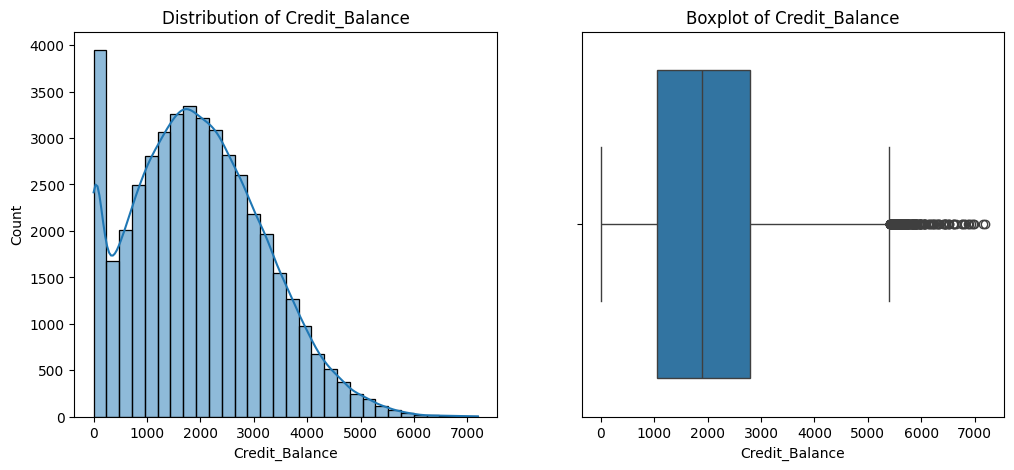

 * Credit_Balance is approximately symmetric
 * Credit_Balance is platykurtic (flat)

--- Churned ---
count    50000.000000
mean         0.289000
std          0.453302
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Churned, dtype: float64


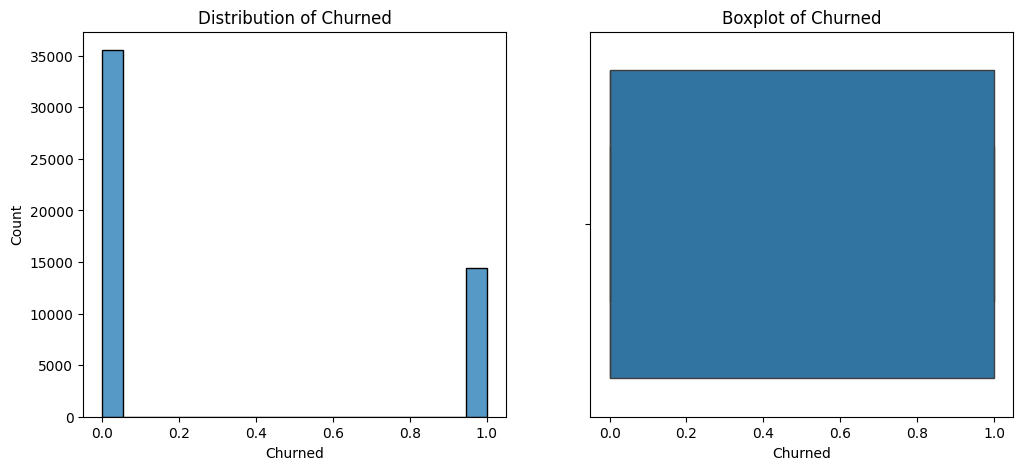

 * Churned is approximately symmetric
 * Churned is platykurtic (flat)


In [ ]:
# Define numeric columns


Numerical_col = df.select_dtypes(include=['int64','float64']).columns

for col in Numerical_col:
    print(f"\n--- {col} ---")
    print(df[col].describe())

    plt.figure(figsize=(12,5))

    # Histogram
    plt.subplot(1,2,1)
    if df[col].nunique() > 10:
        sns.histplot(df[col].dropna(), kde=True, bins=30)
    else:
        sns.histplot(df[col].dropna(), kde=False)
    plt.title(f'Distribution of {col}')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    plt.show()

    # Skewness & Kurtosis
    skewness = df[col].skew()
    kurtosis = df[col].kurt()

    # Skewness interpretation
    if skewness > 1:
        print(f" * {col} is right-skewed")
    elif skewness < -1:
        print(f" * {col} is left-skewed")
    else:
        print(f" * {col} is approximately symmetric")

    # Kurtosis interpretation (excess kurtosis)
    if kurtosis > 0:
        print(f" * {col} is leptokurtic (peaked)")
    elif kurtosis < 0:
        print(f" * {col} is platykurtic (flat)")
    else:
        print(f" * {col} is mesokurtic (normal-like)")


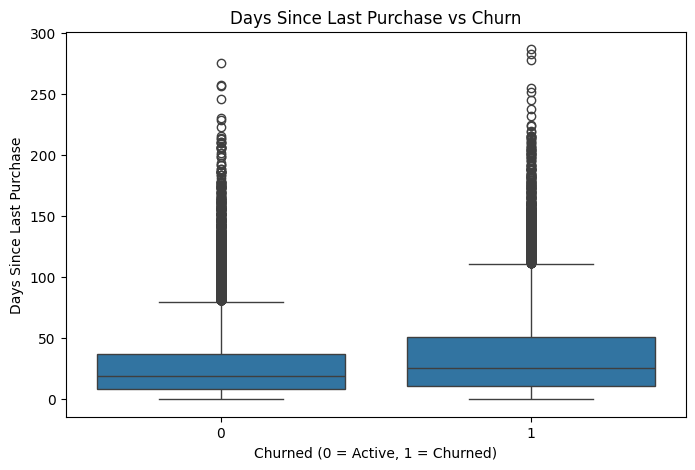

In [ ]:
#Boxplot
#📊 Days_Since_Last_Purchase vs Churned

plt.figure(figsize=(8,5))
sns.boxplot(x='Churned', y='Days_Since_Last_Purchase', data=df)
plt.title('Days Since Last Purchase vs Churn')
plt.xlabel('Churned (0 = Active, 1 = Churned)')
plt.ylabel('Days Since Last Purchase')
plt.show()



In [ ]:
df['churn_label'] = df['Churned'].map({
    0: 'Not Churned',
    1: 'Churned'
})

In [ ]:
# Fill numerical columns
num_cols = df.select_dtypes(include=['int64','float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical columns
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna('Unknown')

# Save dataframe to Excel
df.to_excel("ecommerce_clean_for_powerbi.xlsx", index=False)
print("Clean Excel file saved: ecommerce_clean_for_powerbi.xlsx")



Clean Excel file saved: ecommerce_clean_for_powerbi.xlsx


###🧠 Handle Missing Values

---
  Missing engagement values often indicate low or inactive customer behavior, which itself can be a strong churn signal.


In [ ]:
import pandas as pd

# -----------------------------
# Step 3a: Clip & fill Age
df['Age'] = df['Age'].clip(18, 90)
df['Age'] = df['Age'].fillna(df['Age'].median())

# -----------------------------
# Step 3b: Clip Total_Purchases
df['Total_Purchases'] = df['Total_Purchases'].clip(lower=0)

# -----------------------------
# Step 3c: Behavioral features (zero-fill)
behavior_cols = [
    'Wishlist_Items',
    'Product_Reviews_Written',
    'Social_Media_Engagement_Score',
    'Mobile_App_Usage',
    'Credit_Balance'
]

# Create missing flags BEFORE filling
for col in behavior_cols:
    df[col + '_Missing'] = df[col].isnull().astype(int)

df[behavior_cols] = df[behavior_cols].fillna(0)

# -----------------------------
# Step 3d: Engagement metrics (median-fill)
median_cols = [
    'Session_Duration_Avg',
    'Pages_Per_Session',
    'Days_Since_Last_Purchase',
    'Discount_Usage_Rate',
    'Returns_Rate',
    'Email_Open_Rate',
    'Customer_Service_Calls',
    'Payment_Method_Diversity'
]

for col in median_cols:
    df[col + '_Missing'] = df[col].isnull().astype(int)
    df[col] = df[col].fillna(df[col].median())

# -----------------------------
# Step 3e: Categorical variables
cat_cols = ['Gender', 'Country', 'City', 'Signup_Quarter']

for col in cat_cols:
    df[col] = df[col].fillna('Unknown')


In [ ]:
##Correlation with Churn

#(Because churn is binary, we look at direction & strength, not causation)

#Positive correlation → higher value = more churn

#Negative correlation → higher value = less churn


#Recency and engagement metrics show the strongest correlation with churn, reinforcing the importance of customer activity patterns.

corr = df.corr(numeric_only=True)['Churned'].sort_values(ascending=False)
print(corr)

#----------------------------------------


Churned                                  1.000000
Customer_Service_Calls                   0.290384
Cart_Abandonment_Rate                    0.277963
Days_Since_Last_Purchase                 0.148015
Returns_Rate                             0.051122
Average_Order_Value                      0.042288
Payment_Method_Diversity                 0.004767
Membership_Years                        -0.000623
Lifetime_Value                          -0.010684
Discount_Usage_Rate                     -0.074152
Age                                     -0.102383
Credit_Balance                          -0.147990
Total_Purchases                         -0.160393
Product_Reviews_Written                 -0.174459
Social_Media_Engagement_Score           -0.179829
Wishlist_Items                          -0.189569
Login_Frequency                         -0.204379
Mobile_App_Usage                        -0.211376
Email_Open_Rate                         -0.216233
Session_Duration_Avg                    -0.219512


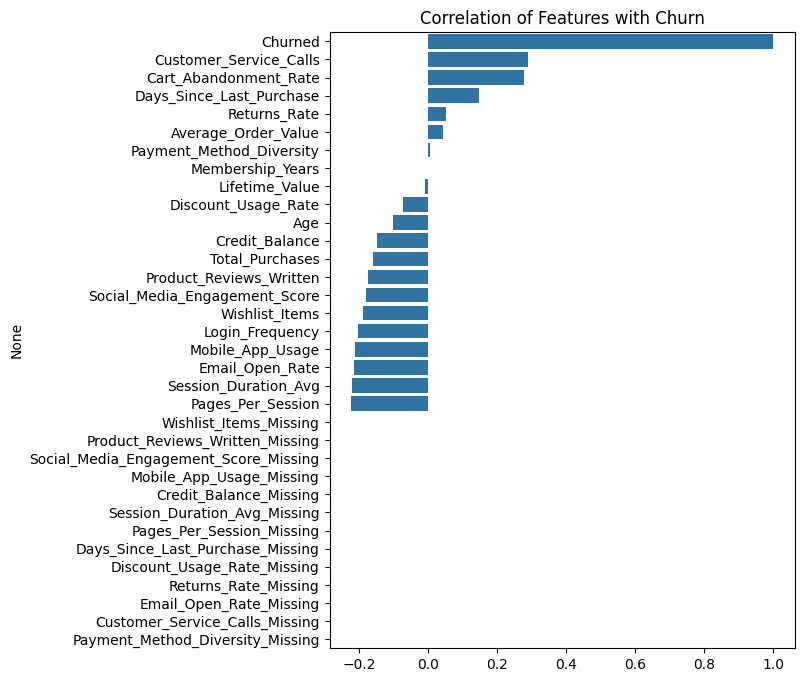

In [ ]:

plt.figure(figsize=(6,8))
sns.barplot(x=corr.values, y=corr.index)
plt.title('Correlation of Features with Churn')
plt.show()
#-------------------------------------


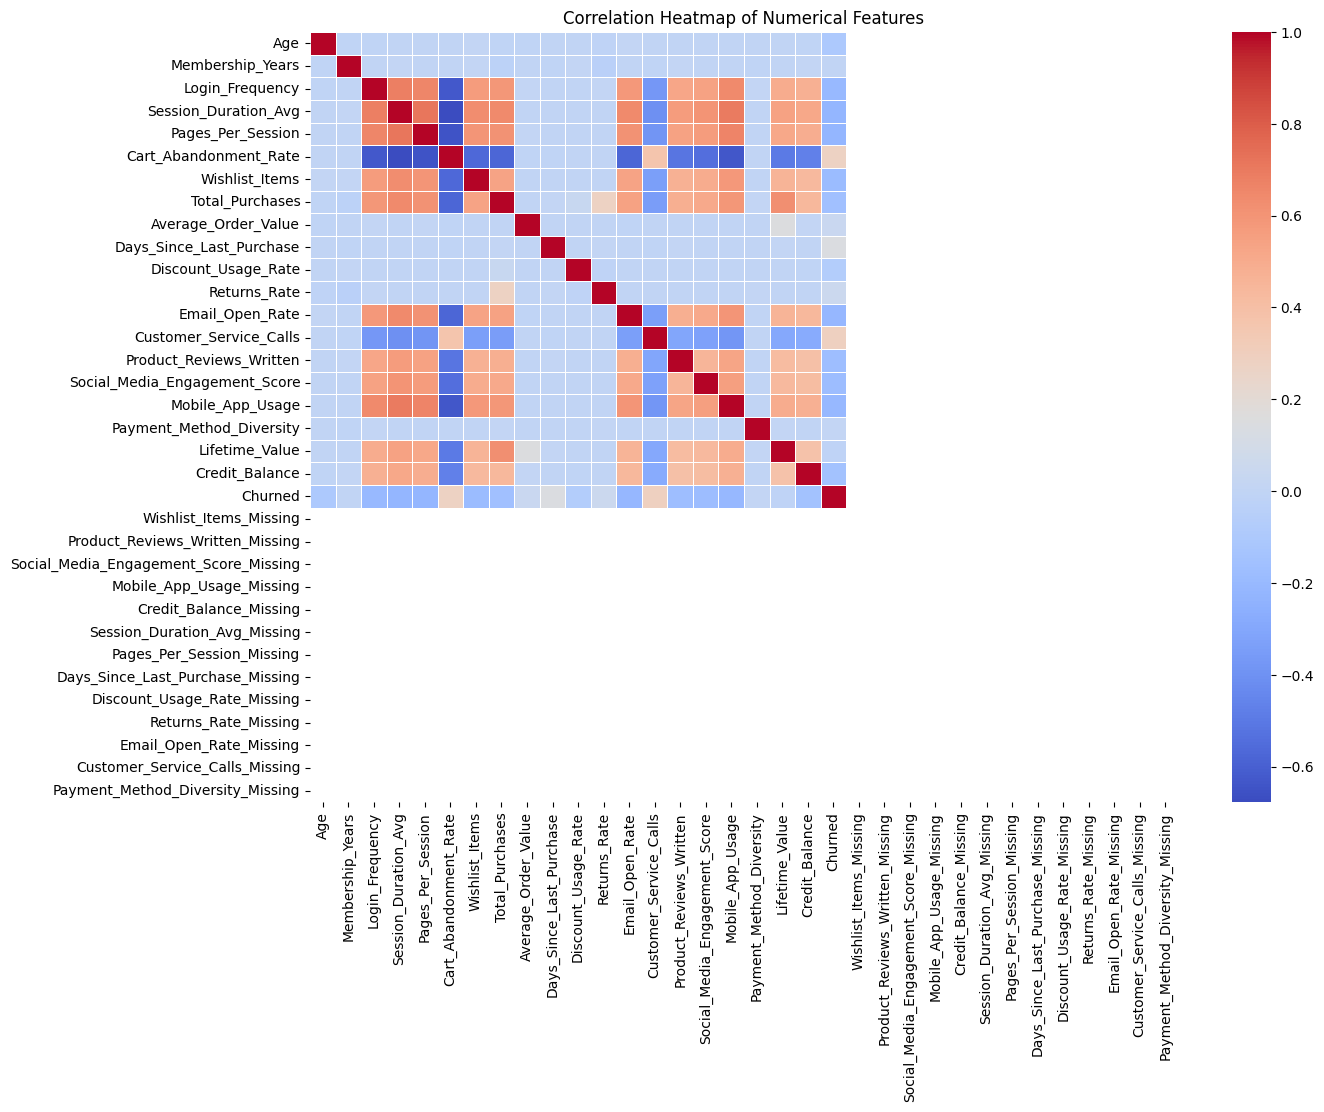

In [ ]:

# Select numeric columns
num_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
corr_matrix = num_df.corr()

# Plot heatmap
plt.figure(figsize=(14,10))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    annot=False,
    linewidths=0.5
)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()




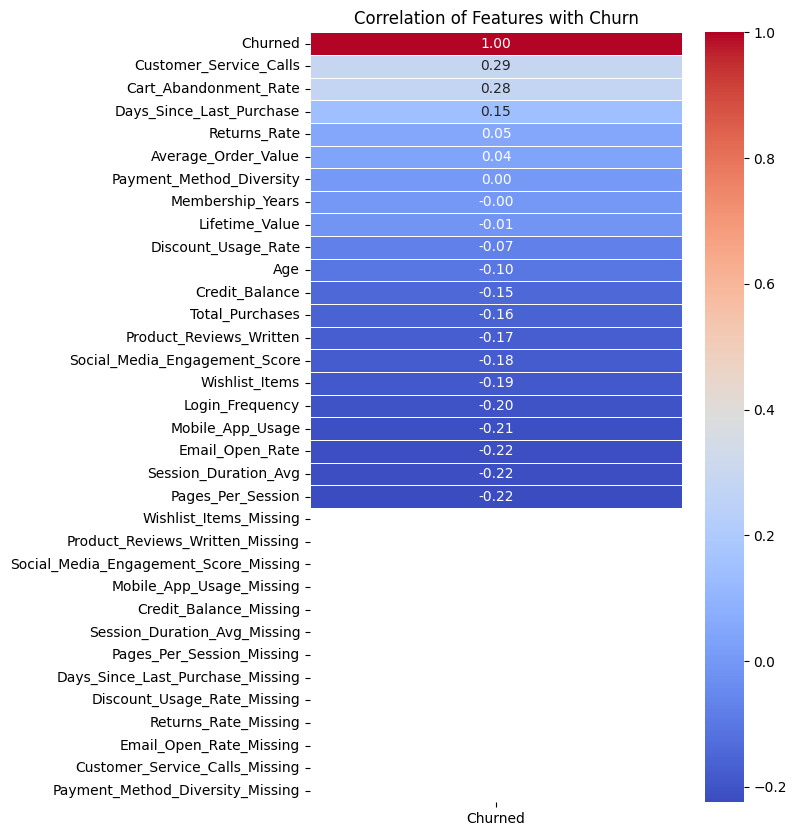

In [ ]:
#---------------------------------------------


churn_corr = corr_matrix[['Churned']].sort_values(by='Churned', ascending=False)

plt.figure(figsize=(6,10))
sns.heatmap(
    churn_corr,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation of Features with Churn")
plt.show()



In [ ]:
df.isnull().sum().sort_values(ascending=False).head()


,0
Age,0
Gender,0
Country,0
City,0
Membership_Years,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 39 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age                                    50000 non-null  float64
 1   Gender                                 50000 non-null  object 
 2   Country                                50000 non-null  object 
 3   City                                   50000 non-null  object 
 4   Membership_Years                       50000 non-null  float64
 5   Login_Frequency                        50000 non-null  float64
 6   Session_Duration_Avg                   50000 non-null  float64
 7   Pages_Per_Session                      50000 non-null  float64
 8   Cart_Abandonment_Rate                  50000 non-null  float64
 9   Wishlist_Items                         50000 non-null  float64
 10  Total_Purchases                        50000 non-null  float64
 11  Av

Detecting outliers

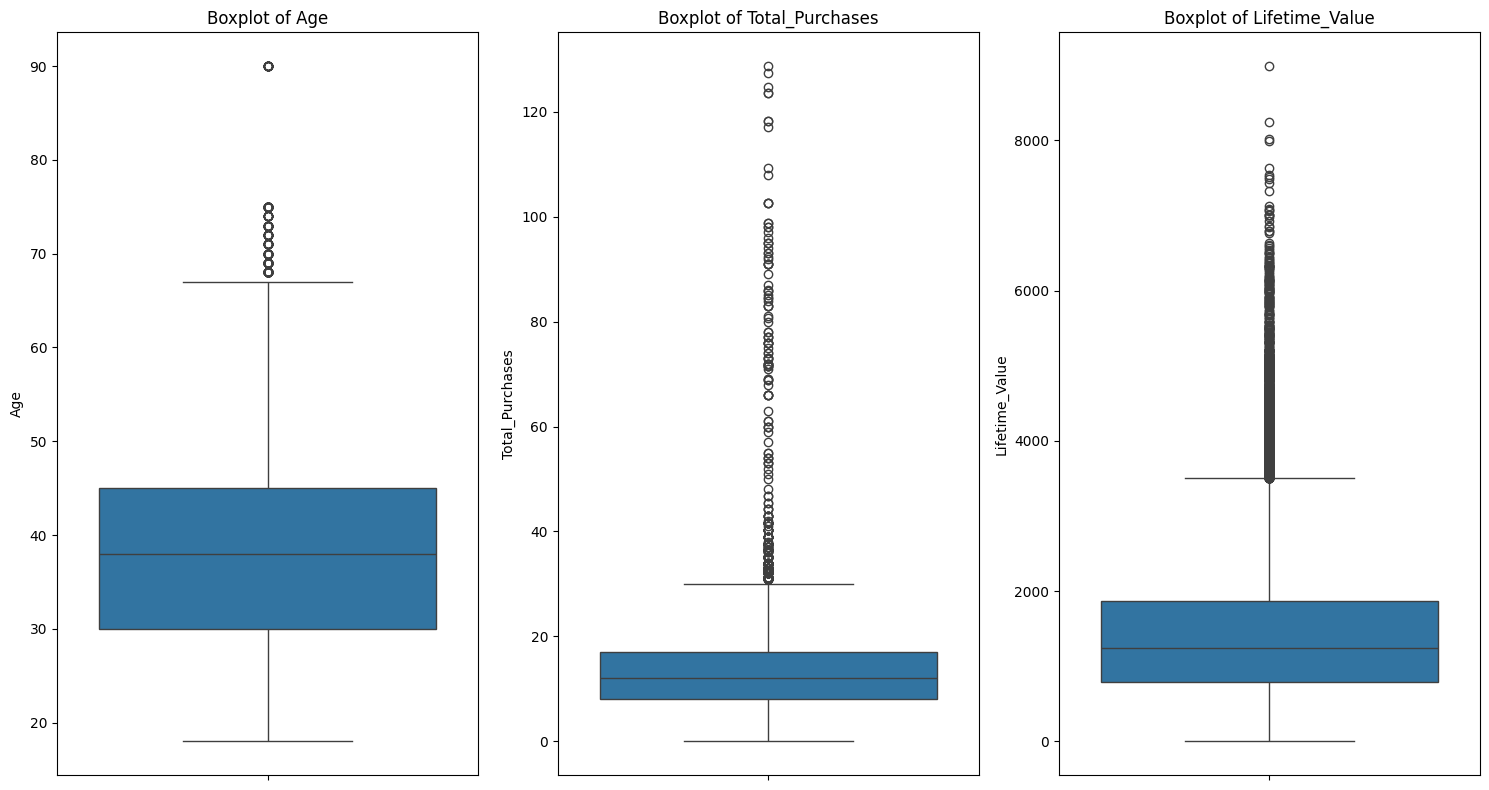

In [ ]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(['Age', 'Total_Purchases', 'Lifetime_Value'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


In [ ]:
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")
    return outliers

outliers_total = detect_outliers_iqr(df, 'Total_Purchases')


Total_Purchases: 604 outliers


In [ ]:
from scipy.stats import zscore

num_cols = ['Age', 'Total_Purchases', 'Lifetime_Value']
z_scores = df[num_cols].apply(zscore)

# Flag rows where any column has |z| > 3 (common threshold)
outliers_z = df[(z_scores.abs() > 3).any(axis=1)]
print(f"Total outliers detected using Z-score: {len(outliers_z)}")


Total outliers detected using Z-score: 1052



Machine Learning Tasks:

Binary classification (churn prediction)

In [ ]:

# Features & target
X = df.drop(columns=['Churned'])
y = df['Churned']

cat_cols = ['Gender', 'Country', 'City', 'Signup_Quarter']

# Preprocessing
num_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model pipeline
clf = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(n_estimators=200, random_state=42))
])

# Train
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7130
           1       0.92      0.76      0.84      2870

    accuracy                           0.91     10000
   macro avg       0.92      0.87      0.89     10000
weighted avg       0.92      0.91      0.91     10000

ROC AUC: 0.9231305862748068


Customer Segmentation (Clustering)
Goal: Group users with similar behaviors.

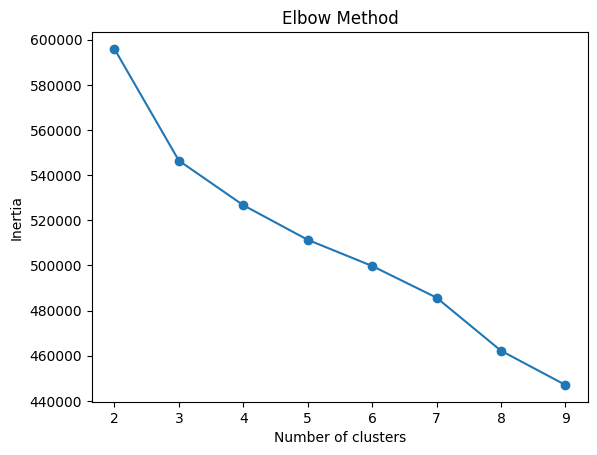

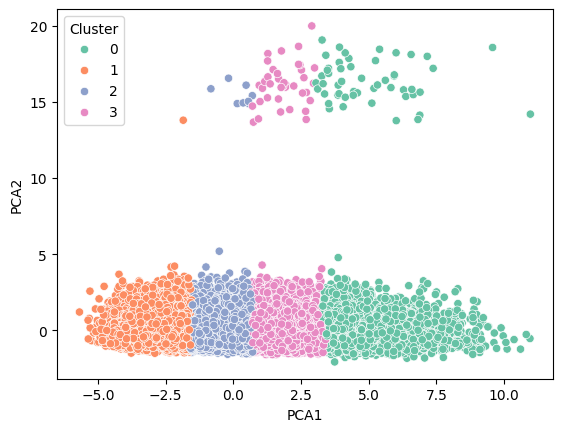

In [ ]:


# Use numerical features for clustering
cluster_cols = [
    'Age', 'Total_Purchases', 'Lifetime_Value', 'Session_Duration_Avg',
    'Pages_Per_Session', 'Days_Since_Last_Purchase', 'Discount_Usage_Rate',
    'Returns_Rate', 'Email_Open_Rate', 'Customer_Service_Calls',
    'Payment_Method_Diversity', 'Wishlist_Items',
    'Product_Reviews_Written', 'Social_Media_Engagement_Score',
    'Mobile_App_Usage', 'Credit_Balance'
]

X_cluster = df[cluster_cols]
X_scaled = StandardScaler().fit_transform(X_cluster)

# Determine optimal k using elbow method
inertia = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(2,10), inertia, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# Fit KMeans with chosen k
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Optional: visualize clusters in 2D using PCA
pca = PCA(n_components=2)
df[['PCA1','PCA2']] = pca.fit_transform(X_scaled)
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.show()


## Power BI Analysis

Customer behavior analysis

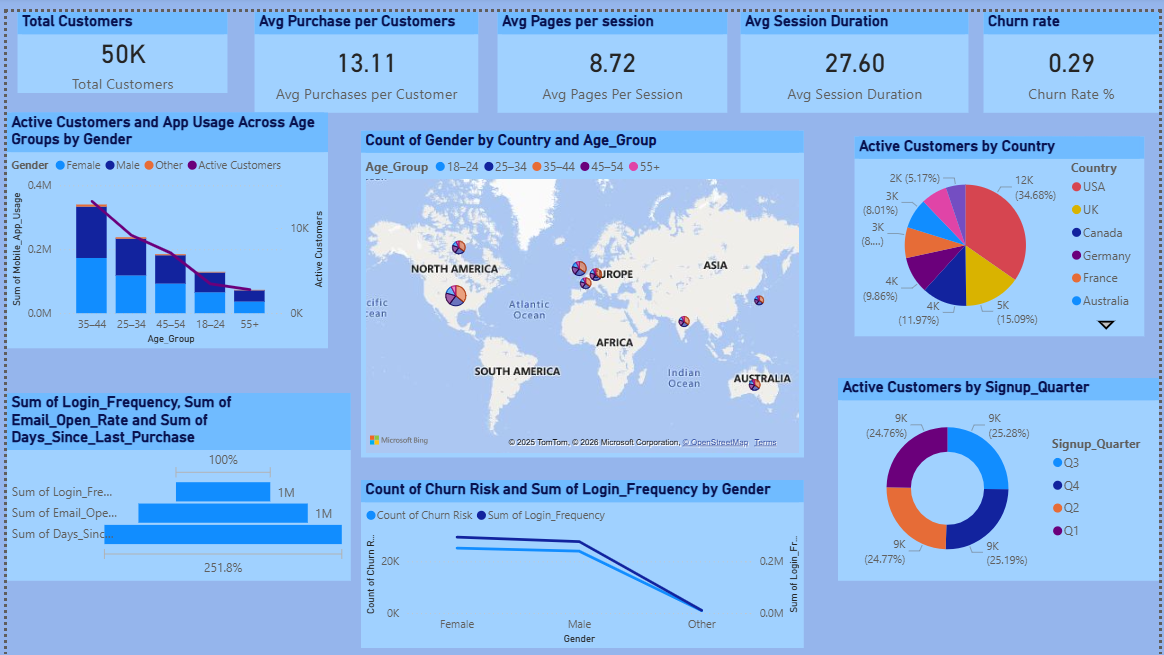





*   Customers are highly engaged across sessions, pages, and logins,
especially in the 25–44 age group and in the US market.

*   However, a 29% churn rate combined with high inactivity since last
purchase suggests conversion and retention gaps rather than awareness or engagement issues.




🔁 Retention & churn

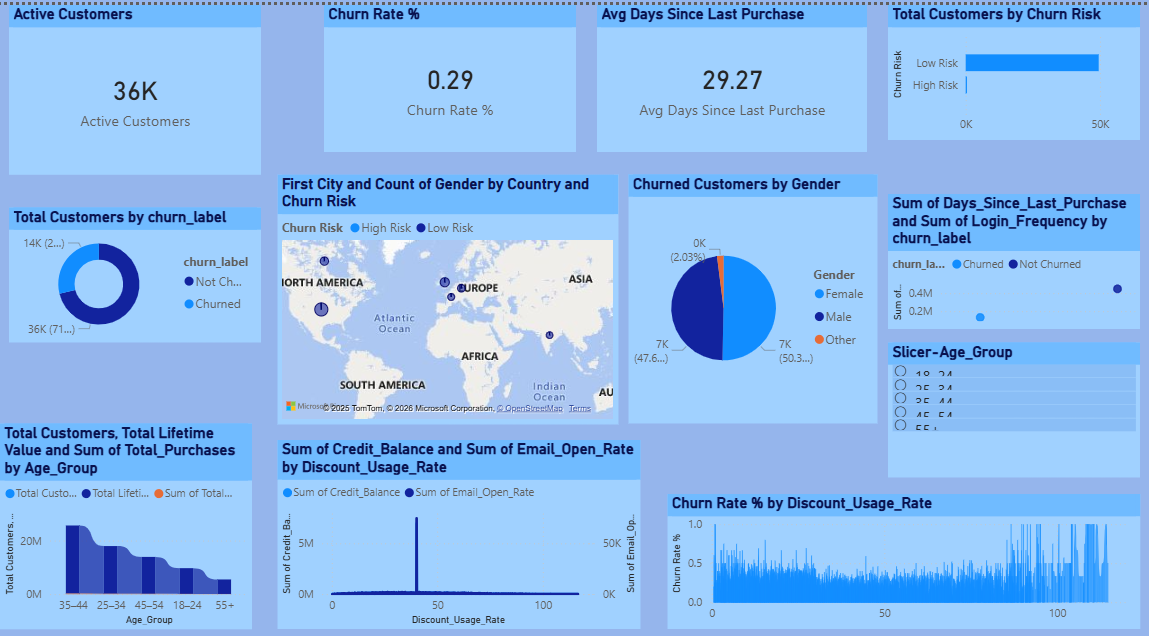

* Strong engagement is observed across sessions, page views, and logins; however, a 29% churn rate and high days since last purchase indicate that engagement is not consistently converting into repeat purchases.

* Churn is primarily behavior-driven and predictable, with inactivity (low login frequency and long purchase gaps) being a stronger indicator than demographics or geography.

* Customers aged 25–44 generate the highest lifetime value and purchase volume, making them the most impactful segment for targeted retention strategies using moderate incentives rather than aggressive discounting.




💰 Lifetime value & monetization

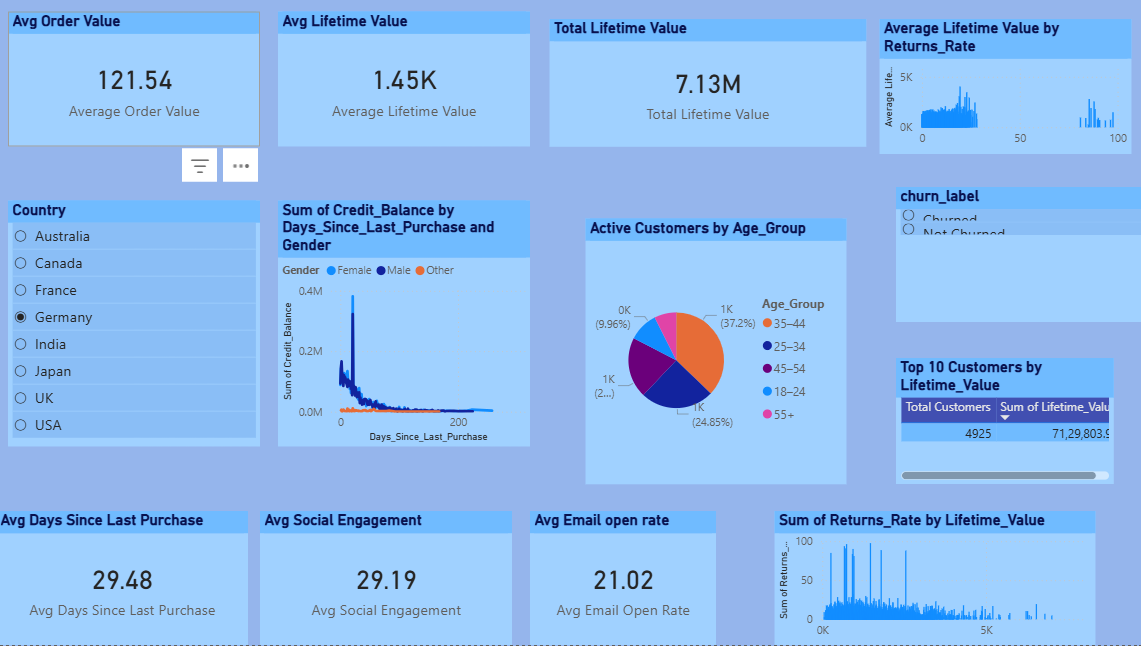

* Revenue is concentrated among high-value customers, with a small segment driving most of the 7.13M total lifetime value.

* Higher returns and longer purchase gaps reduce lifetime value, highlighting the importance of repeat purchases and post-purchase experience.

* Customers aged 25–44 contribute the most value, making them the key segment for retention and monetization efforts.


📱 Engagement (web, mobile, email, social)

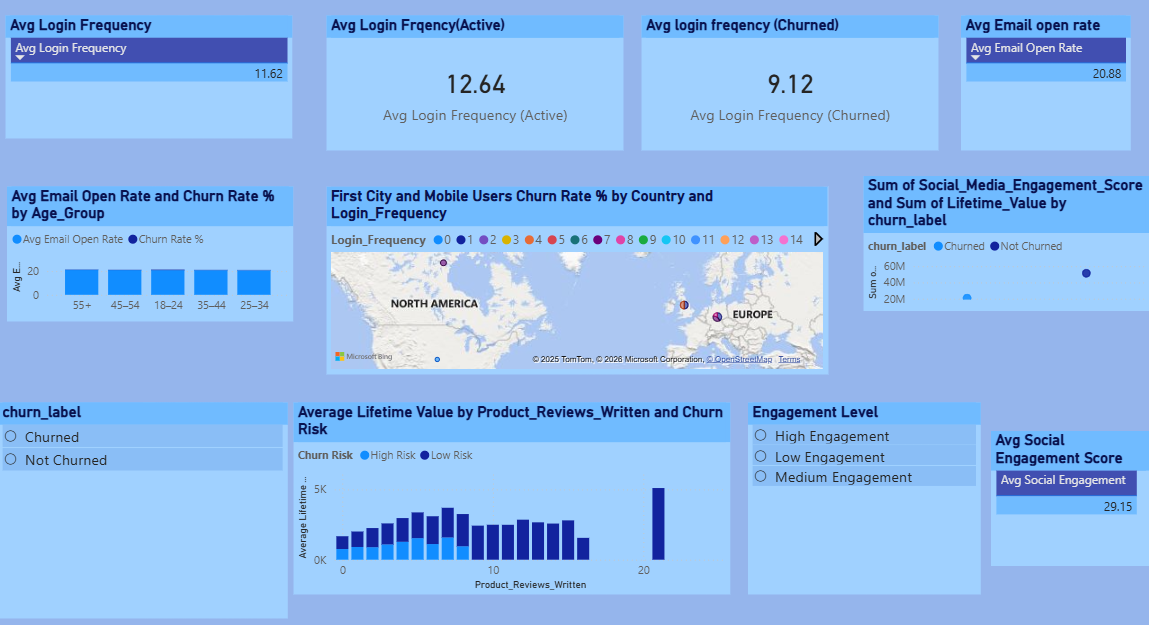

* Active customers engage more frequently than churned users, with higher login frequency (12.64 vs 9.12), reinforcing engagement as a key retention indicator.

* Email and social engagement correlate with higher lifetime value, as non-churned customers show stronger engagement scores and contribute more to total lifetime value.

* Customers who write more product reviews tend to have higher lifetime value and lower churn risk, indicating that deeper platform interaction drives long-term value.
